In [26]:
import os 
import pandas as pd
import gffpandas.gffpandas as gffpd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [125]:
gffs = os.listdir('gff_dir')
len(gffs) # number of plasmids

10633

In [126]:
# get df of gene presence per plasmids
pan = list()
for gff in gffs:
    annotation = gffpd.read_gff3(f"gff_dir/{gff}") # read gff
    pan = pan + list(annotation.filter_feature_of_type(['CDS']).attributes_to_columns()['gene'].unique())
out = pd.DataFrame(0, index=gffs, columns=list(set(pan)))
# makes an empty data frame, col = plasmids, rows = genes
for gff in gffs:
    annotation = gffpd.read_gff3(f"gff_dir/{gff}") # read gff
    for gene in annotation.filter_feature_of_type(['CDS']).attributes_to_columns()['gene'].unique(): # loop through genes
        if gene == None:
            continue
        else: 
            out.at[gff, gene] = out.at[gff, gene] + 1
        # add count

Text(0, 0.5, 'Number of genes per plasmid')

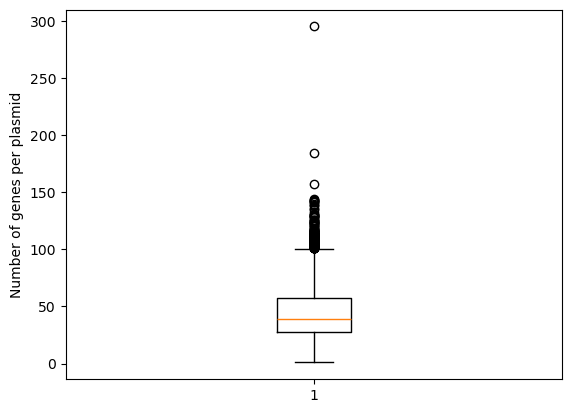

In [157]:
# distribution of number of genes per plasmid
# remove small plasmids?
plt.boxplot(out.sum(axis=1))
plt.ylabel('Number of genes per plasmid')

HI


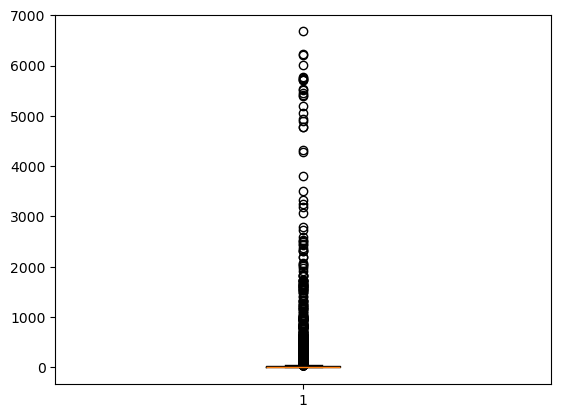

In [149]:
# in how many plasmids is a gene present?
plt.boxplot(out.sum())
plt.boxplot(out.sum())print('')
plt.ylabel('Number of plasmids with a specific gene')

Text(0, 0.5, '% plasmids with a specific gene')

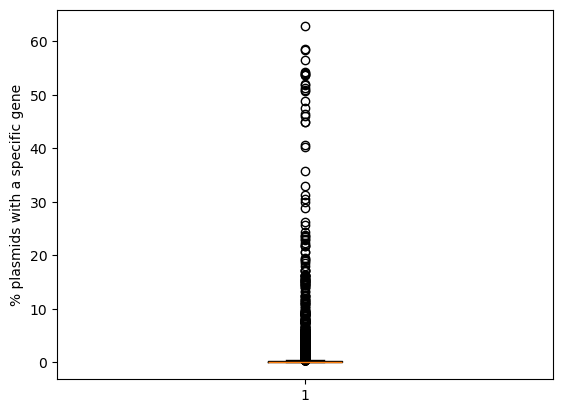

In [156]:
# what percentage of plasmids is a gene present in?
out_sum_perc = out.sum()/10633*100
plt.boxplot(out_sum_perc)
plt.ylabel('% plasmids with a specific gene')

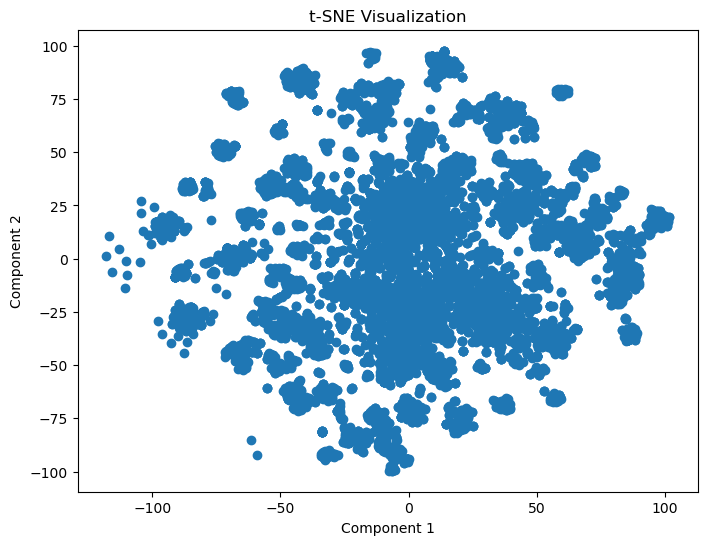

In [139]:
# Perform t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_embedded = tsne.fit_transform(out.values)
# Plot the result
plt.figure(figsize=(8, 6))
plt.scatter(X_embedded[:, 0], X_embedded[:, 1])
plt.title('t-SNE Visualization')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()
# no clear pattern ngl, I guess there are clusters? 